# Query EFD to get hexapod motion information
# 20200218 dataset

In [ ]:
!pip install -U lsst-efd-client

In [1]:
from astropy.time import Time, TimeDelta
import pandas as pd
from lsst_efd_client import EfdClient
from astropy.io import fits
from astropy.visualization import ZScaleInterval
import matplotlib.pyplot as plt
import numpy as np 
from lsst.daf import butler as dafButler
from lsst.pipe.tasks.quickFrameMeasurement import QuickFrameMeasurementTask


In [2]:
from lsst.ts.wep.cwfs.Instrument import Instrument

##1)  retrieve hexapod data for  auxTel donut pairs...

Use the date from https://tstn-016.lsst.io/#data-reduction  : 
2020-01-18 on HD27583 

In [2]:
efd_client = EfdClient('usdf_efd')

In [9]:
day_obs = '20200218'
butler = dafButler.Butler('/sdf/data/rubin/repo/main/')
datasetRefs = butler.registry.queryDatasets('raw',collections='LATISS/raw/all',
                              where=f"instrument='LATISS' AND exposure.day_obs = {day_obs}").expanded()

Find the span of that night of observations:

In [ ]:
spans = []
for i, ref in enumerate(datasetRefs):
    record = ref.dataId.records["exposure"]
    exp = record.dataId['exposure']
    spans.append(record.timespan)
    print(exp, record.group_id, record.group_name)

Find from the butler query the minimum and maximum time to get the timespan for the EFD query:

In [12]:
# https://docs.astropy.org/en/stable/time/index.html 
t1 = spans[0].begin.utc # need to use UTC scale 
t2 = spans[-1].end.utc

Note: there are different fields for that XML, most up-to-date notes are t 
https://ts-xml.lsst.io/sal_interfaces/ATCamera.html#endreadout
    
    

In [13]:
end_readout = await efd_client.select_time_series("lsst.sal.ATCamera.logevent_endReadout", 
                                          '*', t1, t2)

In [15]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
#  ["imageName" --> imageName  
#   "exposureTime" --> requestedExposureTime
#   "groupId" -->
#   "imageType" --> 
#  ]   
end_readout[:4]

,exposureTime,groupId,imageController,imageDate,imageIndex,imageName,imageNumber,imageSource,imageType,imagesInSequence,priority,private_host,private_kafkaStamp,private_origin,private_rcvStamp,private_revCode,private_seqNum,private_sndStamp,timeStampAcquisitionStart,timeStampEndOfReadout
2020-02-18 21:47:01.988435667+00:00,200.0,2020-02-18T21:44:15.927,O,20200218,0,AT_O_20200218_000001,1,AT,DARK,1,1,0,1.582062e+09,1,1.582062e+09,91cd7826,0,1.582062e+09,1.582062e+09,1.582062e+09
2020-02-18 21:50:34.914087014+00:00,200.0,2020-02-18T21:44:15.927,O,20200218,0,AT_O_20200218_000002,2,AT,DARK,1,1,0,1.582063e+09,1,1.582063e+09,91cd7826,0,1.582063e+09,1.582062e+09,1.582063e+09
2020-02-18 21:54:12.958250252+00:00,200.0,2020-02-18T21:44:15.927,O,20200218,0,AT_O_20200218_000003,3,AT,DARK,1,1,0,1.582063e+09,1,1.582063e+09,91cd7826,0,1.582063e+09,1.582063e+09,1.582063e+09
2020-02-18 21:55:45.482235810+00:00,0.0,2020-02-18T21:56:19.527,O,20200218,0,AT_O_20200218_000004,4,AT,BIAS,1,1,0,1.582063e+09,1,1.582063e+09,91cd7826,0,1.582063e+09,1.582063e+09,1.582063e+09


For that date, there are no `additionalKeys` in the XML. But there is `groupId` !  As well as `imageType`... 

In [18]:
end_readout['additionalValues'][0]

'2021-06-08T20\\:22\\:59.890:BIAS'

Find donut image pairs from the EFD query. Various ways:
* if it exists, we need to decode the "additionalValues" column, since `imageType`, `obsReason`, `obsProgram` are all different for CWFS observation vs science frames
* but `20200218` doesn't have that column - skip that step

Find the donut pairs : 
* if the `additionalKeys` contains `imageType` and `obsReason` fields, the CWFS pair of images  would both have `imageType == ENGTEST`, and one would have `obsReason==INTRA` , while the other `obsReason==EXTRA`
* if the `additionalKeys` onlu contains `imageType` but no `obsReason`, then match by `groupName`
* if there isn't an `additionalKeys`  column, there are hopefully `groupId` and `imageType` columns (that is the case for `20200218` data)  


In [17]:
intra_images = []
extra_images = []
intra_times = []
extra_times = []
intra_exptimes = []
extra_exptimes = []

i = 0
npairs = 0
nmiss = 0

groupCol = 'groupId' # 'groupName'
expTimeCol = 'exposureTime'  # 'requestedExposureTime' 

while i < len(end_readout)-2:
    intra = end_readout['imageName'][i]
    extra = end_readout['imageName'][i+1]
    
    # assume has `imageType` and `groupId` cols 
    if ((end_readout[groupCol][i] == end_readout[groupCol][i+1]) and 
        (end_readout[groupCol][i+1] != end_readout[groupCol][i+2]) and
        (end_readout['imageType'][i] == 'ENGTEST')):

        print(f"Got a pair: {intra} x {extra}, {end_readout['imageType'][i]}")

        intra_images.append(intra)
        extra_images.append(extra)
        intra_times.append(end_readout.index[i])
        extra_times.append(end_readout.index[i+1])
        intra_exptimes.append(end_readout[expTimeCol][i])
        extra_exptimes.append(end_readout[expTimeCol][i+1])
        i+=2
        npairs+=1
    else:
        #print(f"No Match: {intra} x {extra}")
        nmiss+=1
        i+=1

print(f"Got {npairs} pairs and {nmiss} misses.")

Got a pair: AT_O_20200218_000028 x AT_O_20200218_000029, ENGTEST
Got a pair: AT_O_20200218_000031 x AT_O_20200218_000032, ENGTEST
Got a pair: AT_O_20200218_000033 x AT_O_20200218_000034, ENGTEST
Got a pair: AT_O_20200218_000035 x AT_O_20200218_000036, ENGTEST
Got a pair: AT_O_20200218_000037 x AT_O_20200218_000038, ENGTEST
Got a pair: AT_O_20200218_000049 x AT_O_20200218_000050, ENGTEST
Got a pair: AT_O_20200218_000139 x AT_O_20200218_000140, ENGTEST
Got a pair: AT_O_20200218_000141 x AT_O_20200218_000142, ENGTEST
Got a pair: AT_O_20200218_000158 x AT_O_20200218_000159, ENGTEST
Got a pair: AT_O_20200218_000160 x AT_O_20200218_000161, ENGTEST
Got a pair: AT_O_20200218_000162 x AT_O_20200218_000163, ENGTEST
Got a pair: AT_O_20200218_000167 x AT_O_20200218_000168, ENGTEST
Got a pair: AT_O_20200218_000169 x AT_O_20200218_000170, ENGTEST
Got a pair: AT_O_20200218_000171 x AT_O_20200218_000172, ENGTEST
Got a pair: AT_O_20200218_000173 x AT_O_20200218_000174, ENGTEST
Got a pair: AT_O_20200218

In [18]:
npairs = len(intra_images)

In [19]:
# Create numpy data structure to hold items of interest
match_data = np.zeros(npairs, dtype=[('intra', '<U35'), 
                                     ('extra', '<U35'), 
                                     ('az', float), 
                                           ('el', float), 
                                           ('rot_pos', float),
                                           ('x', float), 
                                           ('y', float), 
                                           ('z', float), 
                                           ('u', float), 
                                           ('v', float), 
                                           ('w', float), 
                                     ('m1_pressure', float),
                                     ('dz', float)])

In [20]:
# Populate the data structure from the pairs found above
for i in range(npairs):
    
    # Determine time stamps for searching for metadata
    # include ability to correct for TAI if required, but set to zero for the moment

    t1 = Time(intra_times[i]) - TimeDelta(intra_exptimes[i], format='sec') 
    #- TimeDelta(180., format='sec', scale='tai')
    t2 = Time(extra_times[i]) - TimeDelta(2., format='sec')

    azel = await efd_client.select_time_series("lsst.sal.ATMCS.mount_AzEl_Encoders", 
                                               ["elevationCalculatedAngle99", "azimuthCalculatedAngle99"], t1, t2)
    
    rotator = await efd_client.select_time_series("lsst.sal.ATMCS.mount_Nasmyth_Encoders",
                                                  ["nasmyth2CalculatedAngle99"], t1, t2)

    hexapod_vals = await efd_client.select_time_series("lsst.sal.ATHexapod.positionStatus", 
                                           ["reportedPosition0", "reportedPosition1", "reportedPosition2",
                                           "reportedPosition3", "reportedPosition4", "reportedPosition5"], t1 , t2)

    m1_pressure = await efd_client.select_time_series("lsst.sal.ATPneumatics.m1AirPressure",
                                                  ["pressure"], t1, t2)
    
    offset = await efd_client.select_time_series("lsst.sal.ATAOS.logevent_hexapodCorrectionCompleted",
                                                 ["hexapod_x", "hexapod_y", "hexapod_z", "hexapod_u", "hexapod_v", "hexapod_w"], t1, t2)
    
    rot_pos = np.mean(rotator['nasmyth2CalculatedAngle99'])
    el = np.mean(azel['elevationCalculatedAngle99'])
    az = np.mean(azel['azimuthCalculatedAngle99'])
    
    # Take median hexapod position over the time interval
    x = hexapod_vals['reportedPosition0'].median()
    y = hexapod_vals['reportedPosition1'].median()
    z = hexapod_vals['reportedPosition2'].median()
    u = hexapod_vals['reportedPosition3'].median()
    v = hexapod_vals['reportedPosition4'].median()
    w = hexapod_vals['reportedPosition5'].median()

    m1 = np.mean(m1_pressure['pressure'])
    dz = np.nan #round((offset['hexapod_z'][-1] - offset['hexapod_z'][-2])/2.,3)
    #print(t1,t2,az, el, rot_pos, x, y, z, u, u, w,dz)
    match_data[i] = (f"{intra_images[i]}.fits", 
                     f"{extra_images[i]}.fits", az, el, rot_pos, x, y, z, u, u, w, m1, dz)

In [21]:
# Convert to dataframe
df = pd.DataFrame(match_data)

In [22]:
#  Save to a csv file for easy access/tracking
filename=f"{day_obs}_match_sens_matrix_metadata.csv"
df.to_csv(filename)



# 2) Retrieve the  postISR, fit with WEP, collect all Zk results 
Alternatively we can manually run the content of the other notebook (AOS_DM-37629_auxTel_batoid_pipeline.ipynb)

In [4]:
import pandas as pd
day_obs='20200218'
filename=f"{day_obs}_match_sens_matrix_metadata.csv"
df = pd.read_csv(filename)

In [5]:
def get_visitID_from_filename(filename):
    # Expects AT_O_20200218_000167.fits
    # parse out visitID from filename - this is highly annoying
    tmp=filename.split('_')
    prefix=tmp[2] # dayobs without the dashes

    # Don't remember why I used int here... whitespace? 
    # surely fixable but bigger fish.
    suffix='{:05d}'.format(int(tmp[3].split('.')[0])) # SEQNUM, but need to trim extra 0 in obsid
    visitID = int((prefix+suffix))
    #print(visitID)
    return visitID

Instead of trying to run ISR for all these exposures, use the `'LATISS/runs/quickLook'` collection that has `quickLookExp`  datasetRefOrType. This is because when I try running the ISR below, it complains of 


    FileNotFoundError: Not enough datasets (0) found for non-optional connection isr.flat (flat) with minimum=1 for quantum data ID {instrument: 'LATISS', detector: 0, exposure: 2021060800228, ...}.

For each exposure pair: read postISR image, cutout donuts, run WEP

In [6]:
%matplotlib inline
import analysis_tools as at 

def read_intra_extra(butler, expIdIntra, expIdExtra, 
                     datasetRefOrType = 'postISRCCD'):
    exposure_intra =  butler.get(datasetRefOrType, 
                                 dataId={'instrument':'LATISS', 'detector':0, 
                                     'exposure':expIdIntra}, 
                                )
    exposure_extra = butler.get(datasetRefOrType, 
                                dataId={'instrument':'LATISS', 'detector':0, 
                                     'exposure':expIdExtra}, 
                               )
    return exposure_intra, exposure_extra

def make_stamps(qm, exposure_intra, exposure_extra, side=120):
    
    # this is to avoid bright stars towards edges of exposures 
    # eg. 220-221,  222-223,
    # and bleeding edge in  263-264
    ycen=1900  
    xcen=2000
    w=1500


    result_intra = qm.run(intra_exposure[ycen-w:ycen+w, xcen-w:xcen+w], donutDiameter=2 * side)
    result_extra = qm.run(extra_exposure[ycen-w:ycen+w, xcen-w:xcen+w], donutDiameter=2 * side)
    
    #x,y = result.brightestObjCentroidCofM
    
    dy = (
        result_extra.brightestObjCentroidCofM[0]
        - result_intra.brightestObjCentroidCofM[0]
    )
    dx = (
        result_extra.brightestObjCentroidCofM[1]
        - result_intra.brightestObjCentroidCofM[1]
    )
    dr = np.sqrt(dy**2 + dx**2)

    position_out_of_range = dr > 100

    
    x,y = result_intra.brightestObjCentroidCofM
    x = int(x); y = int(y)
    stamp_intra = exposure_intra.image.array[y-side:y+side, x-side:x+side]
    
    if not position_out_of_range:
        # only use if the extra-focal position is not widely different
        x,y = result_extra.brightestObjCentroidCofM
        x = int(x); y = int(y)
    stamp_extra = exposure_extra.image.array[y-side:y+side, x-side:x+side]
    
    return stamp_intra, stamp_extra# , result

show the effect of limiting the range of the image 

In [7]:
import analysis_tools as at
import importlib as imp
imp.reload(at)


<module 'analysis_tools' from '/sdf/data/rubin/user/scichris/WORK/AOS/analysis_tools.py'>

In [39]:
for i in range(len(df)):
    expIdIntra = get_visitID_from_filename(df['intra'][i])# intra_expids[i]
    expIdExtra = get_visitID_from_filename(df['extra'][i])
    at.preview_auxtel_pair(exps=[expIdIntra,expIdExtra],
                      datasetRefOrType='quickLookExp', 
                      collections=['LATISS/raw/all', 'LATISS/calib', 'LATISS/runs/quickLook'], 
                           limits=None)#[1900,2000,1500])

NameError: name 'at' is not defined

Of the above, we skip the following:



In [ ]:
skip = [0,1,17]
for i in skip:
    expIdIntra = get_visitID_from_filename(df['intra'][i])# intra_expids[i]
    expIdExtra = get_visitID_from_filename(df['extra'][i])
    at.preview_auxtel_pair(exps=[expIdIntra,expIdExtra],
                      datasetRefOrType='quickLookExp', 
                      collections=['LATISS/raw/all', 'LATISS/calib', 'LATISS/runs/quickLook'], 
                           limits=None)#[1900,2000,1500])

Run the WEP:

In [10]:
i=0
expIdIntra = get_visitID_from_filename(df['intra'][i])

28

11 2020021800167 2020021800168


saved DM-37676/auxTel_2020021800167_stamps_wep_cwfs_zk
12 2020021800169 2020021800170


saved DM-37676/auxTel_2020021800169_stamps_wep_cwfs_zk
13 2020021800171 2020021800172


saved DM-37676/auxTel_2020021800171_stamps_wep_cwfs_zk
14 2020021800173 2020021800174


saved DM-37676/auxTel_2020021800173_stamps_wep_cwfs_zk
15 2020021800175 2020021800176


saved DM-37676/auxTel_2020021800175_stamps_wep_cwfs_zk
16 2020021800177 2020021800178


saved DM-37676/auxTel_2020021800177_stamps_wep_cwfs_zk
18 2020021800181 2020021800182


saved DM-37676/auxTel_2020021800181_stamps_wep_cwfs_zk
19 2020021800184 2020021800185


saved DM-37676/auxTel_2020021800184_stamps_wep_cwfs_zk
20 2020021800187 2020021800188


saved DM-37676/auxTel_2020021800187_stamps_wep_cwfs_zk


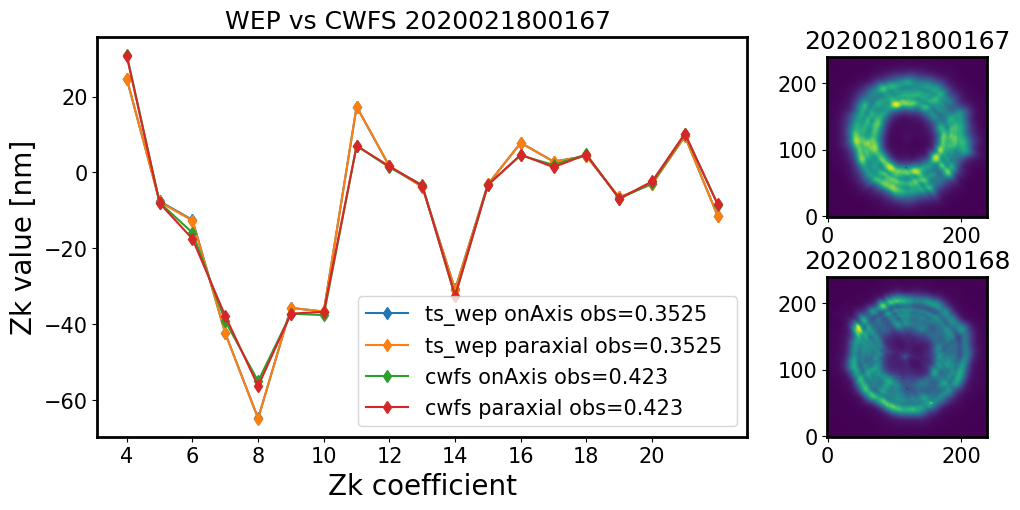

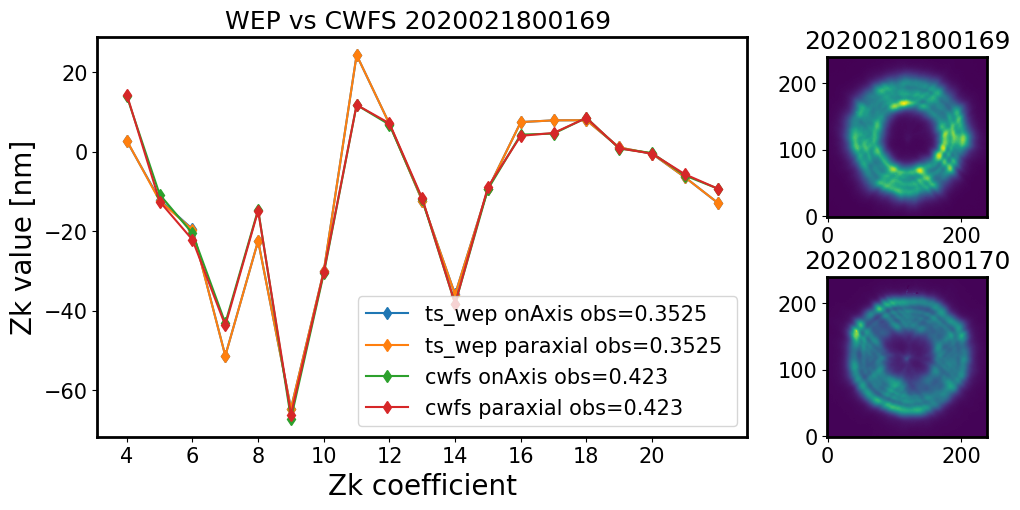

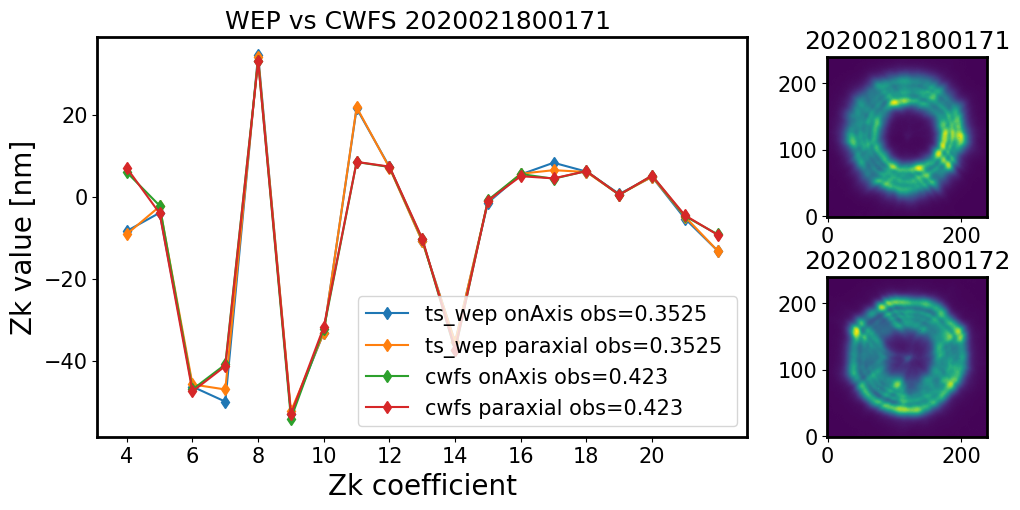

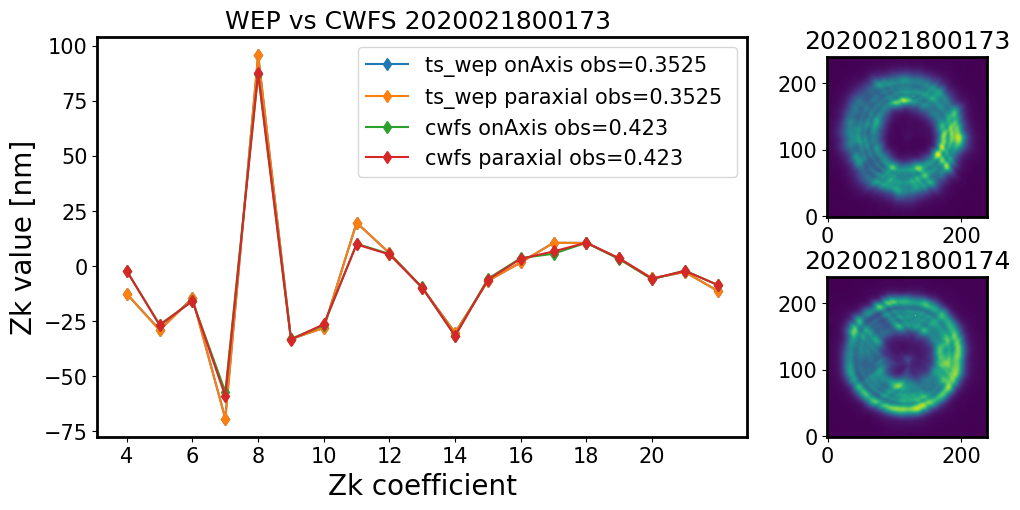

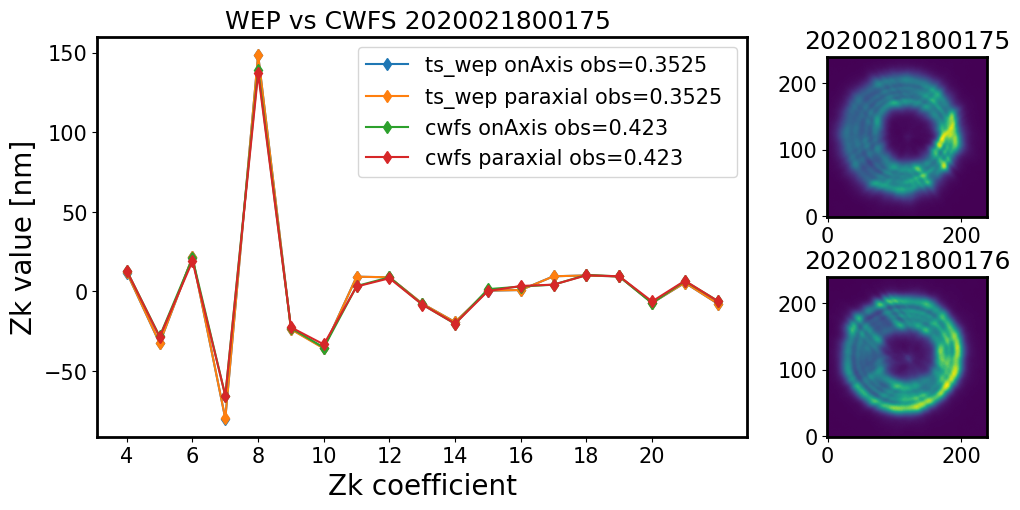

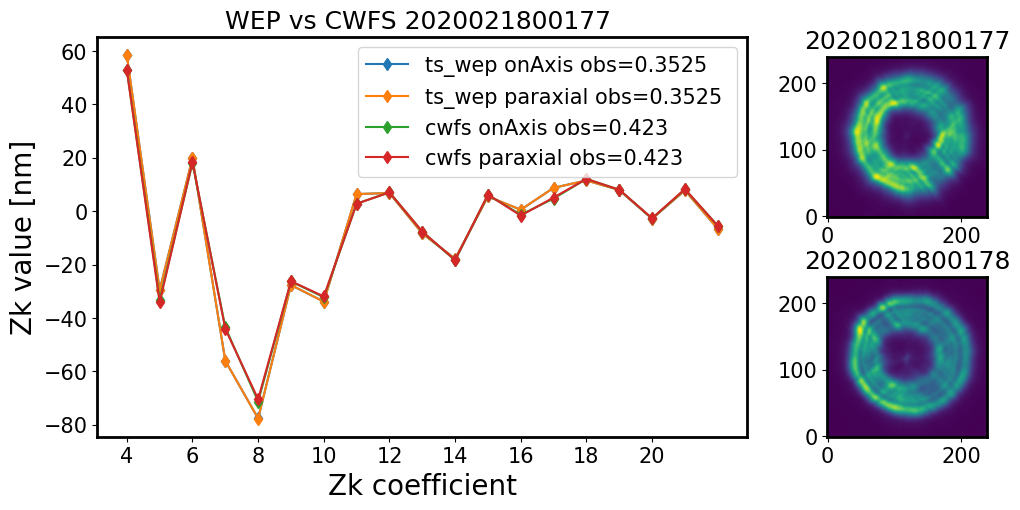

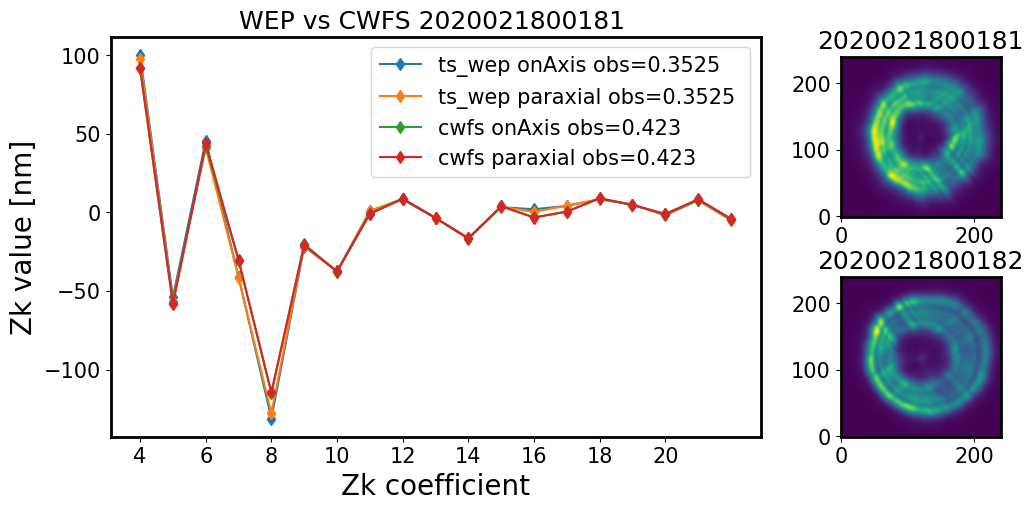

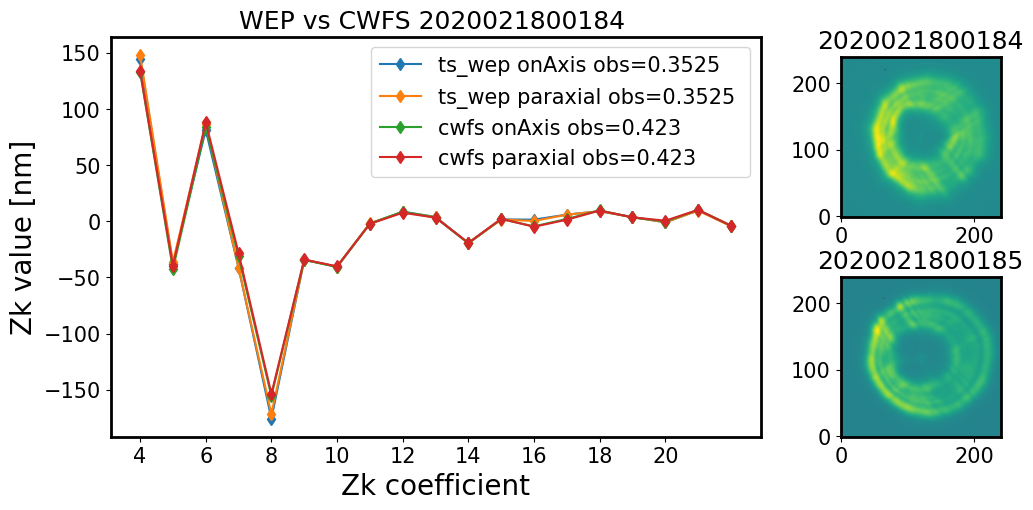

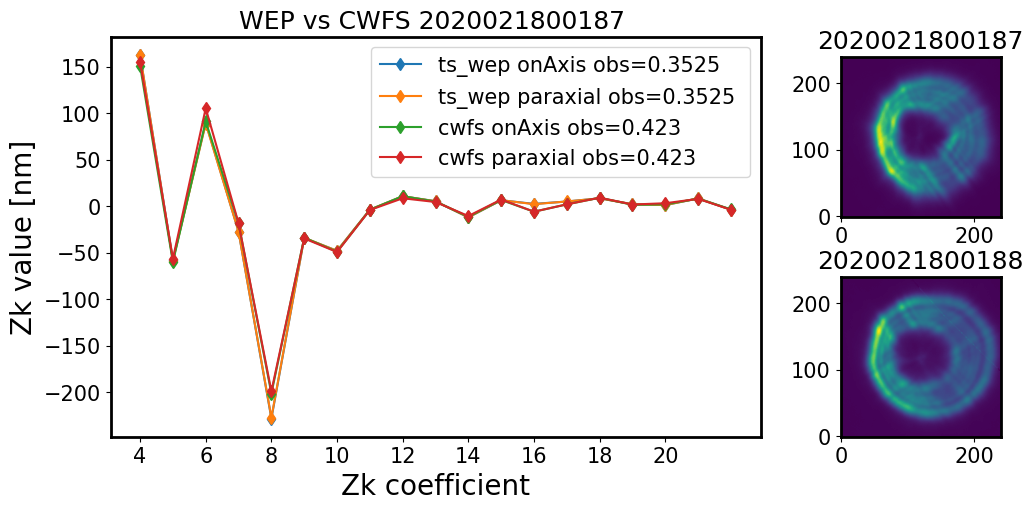

In [14]:
intra_seqNums = [167,169,171,173,175,177,181,184,187]

butler = dafButler.Butler('/sdf/data/rubin/repo/main/',
                          collections=['LATISS/raw/all', 'LATISS/calib', 'LATISS/runs/quickLook'])
for i in range(len(df)):
        expIdIntra = get_visitID_from_filename(df['intra'][i])# intra_expids[i]
        seqNum = int(str(expIdIntra)[-3:])
        if seqNum in intra_seqNums:
            expIdExtra = get_visitID_from_filename(df['extra'][i])#extra_expids[i]

            print(i, expIdIntra, expIdExtra)

            intra_exposure, extra_exposure = read_intra_extra(butler, expIdIntra, 
                                                              expIdExtra,
                                                             datasetRefOrType='quickLookExp')

            qm_config = QuickFrameMeasurementTask.ConfigClass()
            qm = QuickFrameMeasurementTask(config=qm_config)

            side = 120
            intra_stamp, extra_stamp = make_stamps(qm,intra_exposure,extra_exposure, side)

            # run WEP 
            wepZk = {}
            for model in ['onAxis', 'paraxial']:
                wepZk[model] = at.fit_ts_wep(intra_stamp, extra_stamp, fieldXYIntra=np.zeros(2), 
                                          fieldXYExtra=np.zeros(2), 
                                          sizeInPix = 2*side,
                                          opticalModel=model)
                
            # run CWFS with incorrect obscuration
            cwfsZk = {}
            for model in ['onAxis', 'paraxial']:
                cwfsZk[model] = at.fit_cwfs(intra_stamp, extra_stamp, fieldXYIntra=np.zeros(2), 
                                          fieldXYExtra=np.zeros(2), 
                                          side = side, obscuration=0.423,
                                          opticalModel=model)
      
            # store the stamps and wep fit of data
            outDir = 'DM-37676'
            fname = f'auxTel_{expIdIntra}_stamps_wep_cwfs_zk'
            fpath = os.path.join(outDir,fname)
            print(f'saved {fpath}')
            np.savez(fpath,
                intra=intra_stamp,
                extra=extra_stamp, 
                expIntra=expIdIntra,
                expExtra=expIdExtra,
                zkfit=wepZk,
                zkfitcwfs = cwfsZk
                    )


            # Illustrate the results 
            fig = plt.figure(figsize=(10,4))
            # left bottom width height
            ax1 = fig.add_axes([0,0,0.65,1])

            for model in wepZk.keys():
                ax1.plot(np.arange(4,23), wepZk[model], '-d', label=f'ts_wep {model} obs=0.3525 ')
                
            for model in cwfsZk.keys():
                ax1.plot(np.arange(4,23), cwfsZk[model], '-d', label=f'cwfs {model} obs=0.423 ')

            ax1.set_xticks(range(4,22)[::2])
            ax1.set_title(f'WEP vs CWFS {expIdIntra} ')#fieldXY=(0,0) ')
            ax1.legend()
            ax1.set_xlabel('Zk coefficient')
            ax1.set_ylabel('Zk value [nm]')

            # bottom right axis
            ax2 = fig.add_axes([0.61, 0, 0.4,0.4])
            ax2.imshow(extra_stamp, origin='lower')
            ax2.set_title(expIdExtra)

            # top right axis 
            ax3 = fig.add_axes([0.61,0.55, 0.4, 0.4])
            ax3.imshow(intra_stamp,origin='lower')
            ax3.set_title(expIdIntra, )



Limit the df to the exposures I run, and populate with the results:

In [15]:
df['intra_seqNum'] = [int(a.split('_')[-1][3:6]) for a in df['intra'].values]
m = np.in1d(df['intra_seqNum'], intra_seqNums)
df2=df.loc[m].copy()


In [120]:
#Based on the fit, I also skip several other indices 0,1,17 are obviously to skip,
# # but 2:8 were not meant for that experiment either 
# skip = [0,1,2,3,4,5,6,7,8,17]

# all_idx = np.arange(len(df))
# keep_idx = all_idx[~np.in1d(all_idx,skip)]
# df2 = df.iloc[keep_idx].copy()

In [17]:
zern_defocus_nm = []
zern_xastig_nm= []
zern_yastig_nm= []
zern_xcoma_nm= []
zern_ycoma_nm= []
zern_xtrefoil_nm= []
zern_ytrefoil_nm= []
zern_spherical_nm= []

zern_defocus_nmc = []
zern_xastig_nmc= []
zern_yastig_nmc= []
zern_xcoma_nmc= []
zern_ycoma_nmc= []
zern_xtrefoil_nmc= []
zern_ytrefoil_nmc= []
zern_spherical_nmc= []

for i in range(len(df2)):
    outDir = 'DM-37676'
    expIdIntra = get_visitID_from_filename(df2['intra'].iloc[i])
    fname = f'auxTel_{expIdIntra}_stamps_wep_cwfs_zk.npz'
    fpath = os.path.join(outDir,fname)
    store = np.load(fpath, allow_pickle=True)
    zks = store['zkfit'].item()['onAxis']
    zksc =  store['zkfitcwfs'].item()['onAxis']
    
    # populate the structure  with onAxis results
    zern_defocus_nm.append(zks[0])
    zern_xastig_nm.append(zks[1])
    zern_yastig_nm.append(zks[2])
    zern_xcoma_nm.append(zks[3])
    zern_ycoma_nm.append(zks[4])
    zern_xtrefoil_nm.append(zks[5])
    zern_ytrefoil_nm.append(zks[6])
    zern_spherical_nm.append(zks[7])
    
    zern_defocus_nmc.append(zksc[0])
    zern_xastig_nmc.append(zksc[1])
    zern_yastig_nmc.append(zksc[2])
    zern_xcoma_nmc.append(zksc[3])
    zern_ycoma_nmc.append(zksc[4])
    zern_xtrefoil_nmc.append(zksc[5])
    zern_ytrefoil_nmc.append(zksc[6])
    zern_spherical_nmc.append(zksc[7])
    
df2['zern_defocus_nm'] = zern_defocus_nm
df2['zern_xastig_nm'] = zern_xastig_nm
df2['zern_yastig_nm'] = zern_yastig_nm
df2['zern_xcoma_nm'] = zern_xcoma_nm
df2['zern_ycoma_nm']= zern_ycoma_nm
df2['zern_xtrefoil_nm'] = zern_xtrefoil_nm
df2['zern_ytrefoil_nm'] = zern_ytrefoil_nm
df2['zern_spherical_nm'] = zern_spherical_nm 


df2['zern_defocus_nmc'] = zern_defocus_nmc
df2['zern_xastig_nmc'] = zern_xastig_nmc
df2['zern_yastig_nmc'] = zern_yastig_nmc
df2['zern_xcoma_nmc'] = zern_xcoma_nmc
df2['zern_ycoma_nmc']= zern_ycoma_nmc
df2['zern_xtrefoil_nmc'] = zern_xtrefoil_nmc
df2['zern_ytrefoil_nmc'] = zern_ytrefoil_nmc
df2['zern_spherical_nmc'] = zern_spherical_nmc 
# write data to a new CSV file
filename=f"{day_obs}_match_sens_matrix_metadata_plus_zerns_wep_cwfs.csv"
df2.to_csv(filename) 
print(f'saved as {filename}')

saved as 20200218_match_sens_matrix_metadata_plus_zerns_wep_cwfs.csv


## Next: Fit the data to derive sensitivity matrix terms 

In [18]:
from scipy.optimize import curve_fit
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
def parabola(x,b, x0, a):
    return b + a*(x-x0)**2 
def line(x,b, m):
    return b + m*x 
def invparabola(y,b,x0,a):
    return x0+np.sqrt((y-b)/a)
def invline(y,b,m):
    return (y-b)/m

Read in the stored results (eg. in case kernel died...) 

In [4]:
# day_obs = '20200218'
# filename=f"{day_obs}_match_sens_matrix_metadata_plus_zerns.csv"
# filename=f"{day_obs}_match_sens_matrix_metadata_plus_zerns_wep_cwfs.csv"
# df2 = pd.read_csv(filename)

## Plot y-coma as a function of Y-hexapod decentering (C_Y term)

In [28]:
# [11, 12, 13, 14, 15, 16, 18, 19, 20,]

# intra_exps_use = [167,169,171,173,175,177,181,184,187]
# df2['intra_exp'] = [int(a.split('_')[-1][3:6]) for a in df2['intra'].values]

First, WEP:

WEP 0.3525 Wavefront Y-Coma as func of Y-Hexapod displacement fit intercept and slope  [-183.79343147  150.42026096]
CWFS 0.423 Wavefront Y-Coma as func of Y-Hexapod displacement fit intercept and slope  [-162.90179898  135.76201387]


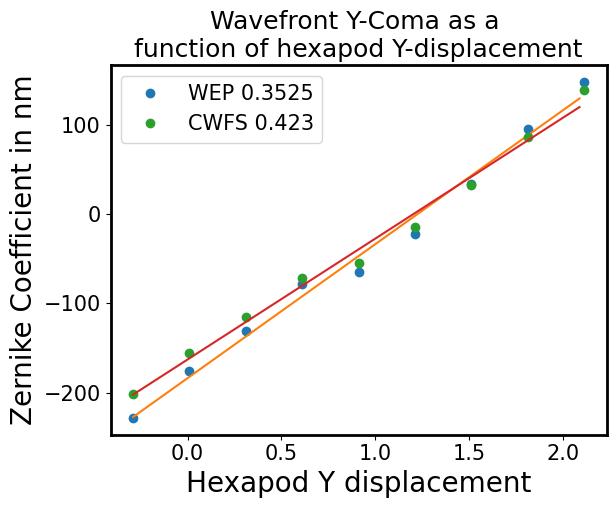

In [57]:
# remove 9,10,21 
# inds = [11, 12, 13, 14, 15, 16, 18, 19, 20,]

# m = np.in1d(df2['intra_exp'], intra_exps_use)
xdata=df2['y']#.loc[m]

for ycol, label in zip(['zern_ycoma_nm', 'zern_ycoma_nmc'],
                       ['WEP 0.3525', 'CWFS 0.423']
                      ):
    ydata=df2[ycol]#.loc[m]

    plt.plot(xdata,ydata,'o', label=label)
    #for idx in inds:#range(len(df2)):#inds:#df2.index:
    #    plt.text(xdata.loc[idx]+0.003,ydata.loc[idx]-1,idx,c='b',alpha=0.6)

    x=np.arange(np.min(xdata), np.max(xdata), np.abs(np.max(xdata) - np.min(xdata))/100 )
    popt,pcov = curve_fit(line, xdata, ydata)
    print(f'{label} Wavefront Y-Coma as func of Y-Hexapod displacement fit intercept and slope ',popt)

    plt.plot(x,line(x, *popt))
plt.legend()
# plt.xlabel('Hexapod displacement in the plane')
plt.ylabel('Zernike Coefficient in nm')
plt.xlabel('Hexapod Y displacement')
plt.title('Wavefront Y-Coma as a \nfunction of hexapod Y-displacement')
plt.show()

## Plot Defocus as a function of Y-hexapod decentering  C_YZ

WEP 0.3525 Wavefront Defocus as a function of Hexapod Y displacement intercept and slope [121.99087557 -74.89433094]
CWFS 0.423 Wavefront Defocus as a function of Hexapod Y displacement intercept and slope [113.60989879 -64.91067401]


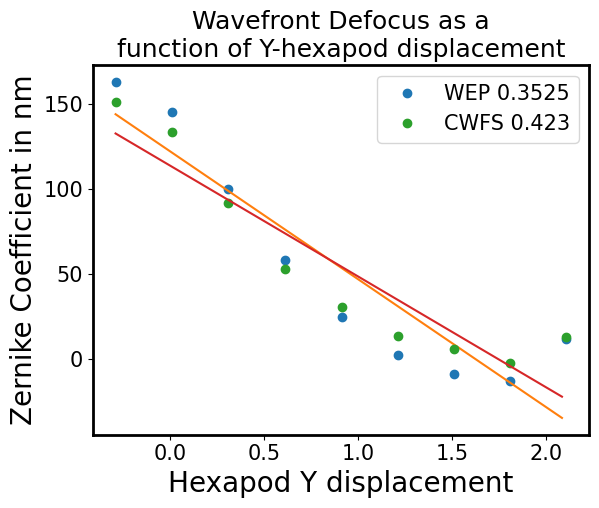

In [59]:


for ycol, label in zip(['', 'c'],
                       ['WEP 0.3525', 'CWFS 0.423']
                      ):
    xdata=df2['y']#.loc#[m]
    ydata=df2[f'zern_defocus_nm{ycol}']#.loc#[m]

    plt.plot(xdata,ydata,'o', label=label)
    # for idx in inds:
    #     plt.text(xdata.loc[idx]+0.003,ydata.loc[idx]-1,idx,c='b',alpha=0.6)
    x=np.arange(np.min(xdata), np.max(xdata), np.abs(np.max(xdata) - np.min(xdata))/100 )
    popt,pcov = curve_fit(line, xdata, ydata)

    plt.plot(x,line(x, *popt))
    
    print(f'{label} Wavefront Defocus as a function of Hexapod Y displacement intercept and slope',popt)#
    
plt.legend()
plt.ylabel('Zernike Coefficient in nm')
plt.xlabel('Hexapod Y displacement')
plt.title(' Wavefront Defocus as a \nfunction of Y-hexapod displacement')
plt.show()

    

## Plot X-Coma as a function of Y-hexapod decentering


WEP 0.3525 Wavefront X-Coma as a function of Y-Hexapod displacement fit intercept and slope  [-35.43459    -17.05033079]
CWFS 0.423 Wavefront X-Coma as a function of Y-Hexapod displacement fit intercept and slope  [-26.68956299 -15.83590135]


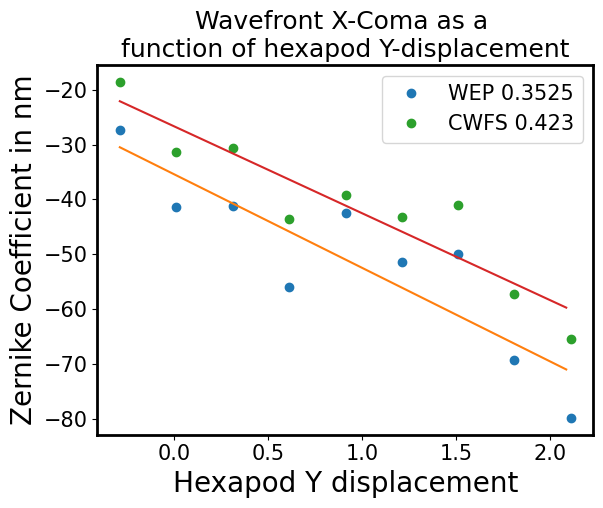

In [63]:
for ycol, label in zip(['', 'c'],
                       ['WEP 0.3525', 'CWFS 0.423']
                      ):
    xdata=df2['y']
    ydata=df2[f'zern_xcoma_nm{ycol}']

    plt.plot(xdata,ydata,'o', label=label)
    # for idx in inds:
    #     plt.text(xdata.loc[idx]+0.003,ydata.loc[idx]-1,idx,c='b',alpha=0.6)
    x=np.arange(np.min(xdata), np.max(xdata), np.abs(np.max(xdata) - np.min(xdata))/100 )
    popt,pcov = curve_fit(line, xdata, ydata)
    plt.plot(x,line(x, *popt))
    print(f'{label} Wavefront X-Coma as a function of Y-Hexapod displacement fit intercept and slope ',popt)


plt.legend()
# plt.xlabel('Hexapod displacement in the plane')
plt.ylabel('Zernike Coefficient in nm')
plt.xlabel('Hexapod Y displacement')
plt.title('Wavefront X-Coma as a \nfunction of hexapod Y-displacement')
plt.show()

# Other relations, not shown in TSTN-016

## Plot x-coma as a function of X-hexapod decentering (C_X term) (?)

WEP 0.3525 Wavefront X-Coma as a function of X-Hexapod displacement fit intercept and slope  [-13163.85344854  -2407.24959787]
CWFS 0.423 Wavefront X-Coma as a function of X-Hexapod displacement fit intercept and slope  [-21216.0243052   -3887.26674357]


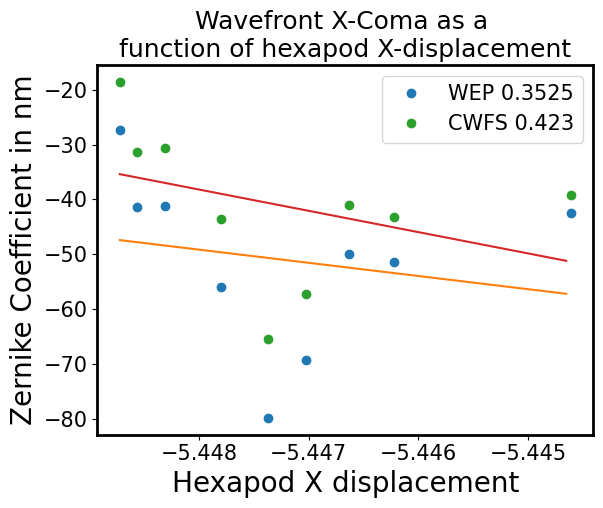

In [66]:
for ycol, label in zip(['', 'c'],
                       ['WEP 0.3525', 'CWFS 0.423']
                      ):
    xdata=df2['x']
    ydata=df2[f'zern_xcoma_nm{ycol}']

    plt.plot(xdata,ydata,'o', label=label)
    #for idx in inds:#range(len(df2)):#inds:#df2.index:
    #    plt.text(xdata.loc[idx]+0.003,ydata.loc[idx]-1,idx,c='b',alpha=0.6)

    x=np.arange(np.min(xdata), np.max(xdata), np.abs(np.max(xdata) - np.min(xdata))/100 )
    popt,pcov = curve_fit(line, xdata, ydata)
    print(f'{label} Wavefront X-Coma as a function of X-Hexapod displacement fit intercept and slope ',popt)

    plt.plot(x,line(x, *popt))
plt.legend()
# plt.xlabel('Hexapod displacement in the plane')
plt.ylabel('Zernike Coefficient in nm')
plt.xlabel('Hexapod X displacement')
plt.title('Wavefront X-Coma as a \nfunction of hexapod X-displacement')
plt.show()

why is this not anyhow similar to C_X ? I.e why is the slope not ~206 ? 

## Plot Defocus as a function of Z-hexapod decentering  (D_Z term ??)

WEP 0.3525 Wavefront Defocus as a function of Hexapod displacement intercept and slope [67.29052297 64.52126677]
CWFS 0.423 Wavefront Defocus as a function of Hexapod displacement intercept and slope [66.54437898 57.55789669]


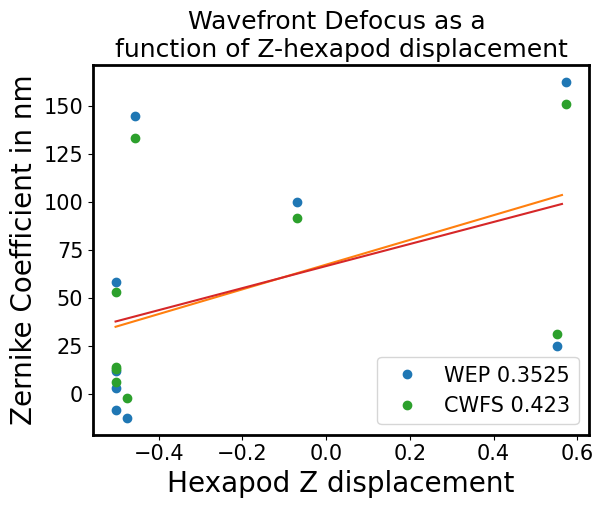

In [69]:
for ycol, label in zip(['', 'c'],
                       ['WEP 0.3525', 'CWFS 0.423']
                      ):
    xdata=df2['z']
    ydata=df2[f'zern_defocus_nm{ycol}']

    plt.plot(xdata,ydata,'o', label=label)
    # for idx in inds:
    #     plt.text(xdata.loc[idx]+0.003,ydata.loc[idx]-1,idx,c='b',alpha=0.6)
    x=np.arange(np.min(xdata), np.max(xdata), np.abs(np.max(xdata) - np.min(xdata))/100 )
    popt,pcov = curve_fit(line, xdata, ydata)

    plt.plot(x,line(x, *popt))
    
    print(f'{label} Wavefront Defocus as a function of Hexapod displacement intercept and slope',popt)    
    
plt.legend()
plt.ylabel('Zernike Coefficient in nm')
plt.xlabel('Hexapod Z displacement')
plt.title('Wavefront Defocus as a \nfunction of Z-hexapod displacement')
plt.show()


what I get is all weird... Why plotting dz as a function of Z4 doesn't result in Dz? I'd expect slope of ~4200...

The first three plots look very similar to the example in https://tstn-016.lsst.io/#eqn-matrix.  

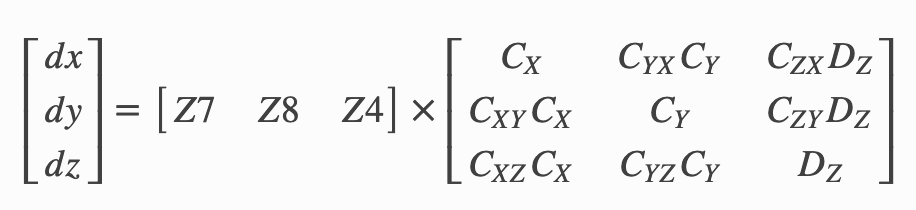


**Next:** calculate all elements of senM, and compare with content of https://github.com/lsst-ts/ts_externalscripts/blob/5e44939e49122176cd4f1687d7f72291bccbb5d3/python/lsst/ts/externalscripts/auxtel/latiss_base_align.py#L116-L125 


which is    

       # Sensitivity matrix: mm of hexapod motion for nm of wfs. To figure out
        # the hexapod correction multiply the calculated zernikes by this.
        # Note that the zernikes must be derotated before applying the
        # corrections. See https://tstn-016.lsst.io/ for information about how
        # these values were derived.
        self.matrix_sensitivity = [
            [1.0 / 206.0, 0.0, 0.0],
            [0.0, -1.0 / 206.0, -(109.0 / 206.0) / 4200],
            [0.0, 0.0, 1.0 / 4200.0],
        ]

  

Questions: how does one arrive at these particular values of senM?

* I'd assume that Cx = dx/z7 , i.e.  1/slope  when we plot z7 (x-coma) as a function  of dx...But I don't get it -  plotting z7 as a function of X-displacement  I don't have the slope of 206 ...

* it appears that Cy = -Cx . Why? Is it because of axial symmetry, and then coma-x becomes coma-y ? But we should have that dy = Cy*z8 + Czy*Dz*z4  So plotting dy as a function of z8 (y-coma), should I treat the two dependencies of dy (on Z8 and z4) independently, so that dx = Cy*z8, i.e.  Cy = dy/z8 = 1/slope of z8 as a function of dy ?  Then Cy would be 1/135, which it isn't...
If then dy = Czy*Dz*z4,  then plotting z4 as a function of dy,  Czy*Dz = 1/slope, and the slope is -74.  So again I don't see how -(109/206) * 1/4200 comes about.  It appears that in the above senM  Dz = 1/4200, and Czy = 109*Cy = -109/206. But how is it derived? 

* it should be that Cz = dz/z4 . But when I plot defocus (z4) as a function of dz, it looks 